In [102]:
import warnings
warnings.filterwarnings('ignore')

# Data Description

- **AppointmentID**: Identification of each appointment.
  
- **Gender**: 
  - Male or Female.
  - Female is the greater proportion, as women take more care of their health in comparison to men.

- **ScheduledDay**: 
  - The day the patient booked the appointment.
  - This is before or on the same day as the AppointmentDay.

- **AppointmentDay**: 
  - The day the appointment is booked for.

- **Age**: 
  - How old the patient is.

- **Neighbourhood**: 
  - Where the appointment takes place.

- **Scholarship**: 
  - True or False.
  - A government financial aid to poor Brazilian families. [Learn more](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
  
- **Hypertension**: 
  - True or False.
  - Indicates if the patient has high blood pressure.

- **Diabetes**: 
  - True or False.
  - Indicates if the patient has diabetes.

- **Alcoholism**: 
  - True or False.
  - Indicates if the patient suffers from alcoholism.

- **Handicap**: 
  - 0-4
  - Refers to the number of disabilities a person has. For example, if a person is blind and cannot walk, the total is 2.

- **SMS_received**: 
  - 1 or more messages sent to the patient.

- **No-show**: 
  - True or False.
  - Indicates whether the patient showed up for their appointment.


## Loading Python Libraries


In [161]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import calendar

from sklearn import tree
from graphviz import Source
import ipywidgets as widgets

import sklearn.metrics as met

import sklearn.tree as tree

from IPython.display import Image  
import pydotplus
from IPython.display import SVG

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

## Loading Dataset


In [104]:
df= pd.read_csv("APPOINTMENT NO SHOW UP.csv")
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [105]:
df.shape

(110527, 13)

## Balance

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64
No-show
No     88208
Yes    22319
Name: count, dtype: int64


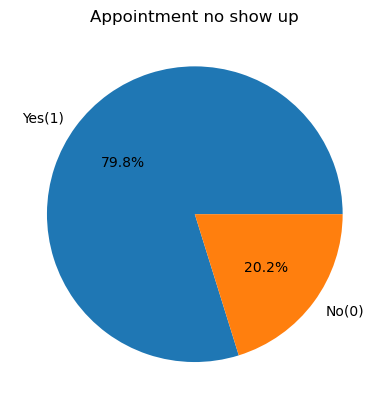

In [106]:
balance = df['No-show'].value_counts(normalize = True)
print(balance)
count=df['No-show'].value_counts()
print(count)

colors = ['#1f77b4', '#ff7f0e']

labels = ["Yes(1)", 'No(0)']
plt.pie([balance[0],balance[1]], labels = labels,colors=colors, autopct='%1.1f%%')
plt.title('Appointment no show up')
plt.show()

## Data Wrangling

### Renaming Columns

In [107]:
df.columns=['AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SmsReceived', 'NoShow']

In [108]:
df.columns

Index(['AppointmentId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SmsReceived', 'NoShow'],
      dtype='object')

## Check for Null values in the dataset

In [109]:
df.isna().sum()

AppointmentId     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SmsReceived       0
NoShow            0
dtype: int64

### As we see, there are no Null values in our dataset

### One-hot encoding

In [110]:
dummy = pd.get_dummies(df['NoShow'])
dummy.drop('Yes', axis=1, inplace=True)
df.drop('NoShow', axis=1, inplace=True)
df = df.join(dummy)
df.head()


,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,No
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True


## Awaiting Days

In [111]:
#Rename columns
df.rename(columns = {'No':'Show'}, inplace = True)

In [112]:
df.AppointmentDay = df.AppointmentDay.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())
df.ScheduledDay = df.ScheduledDay.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())

df['DayOfTheWeek'] = df.AppointmentDay.apply(lambda x: calendar.day_name[x.weekday()])


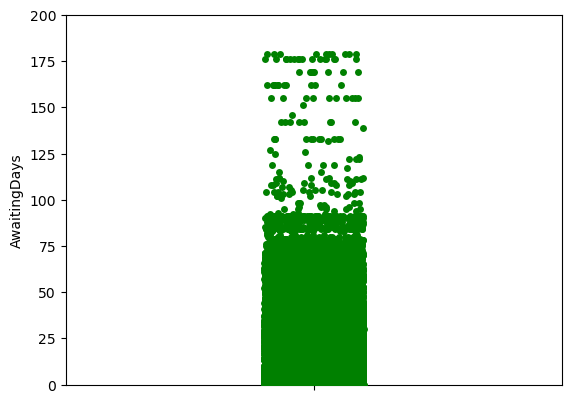

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'AppointmentDay' and 'ScheduledDay' to datetime if they are not already
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Calculate the timedelta in days
AwaitingDays = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Assign the calculated timedelta to a new column in the DataFrame
df['AwaitingDays'] = AwaitingDays

# Plot the data
sns.stripplot(data=df, y='AwaitingDays', jitter=True, color='Green')  # Note: 'data=' parameter added
plt.ylim(0, 200)
plt.show()


#### Inference : 
From the above plot we can see that there are some patients who have to wait for even more than 4 months to get the appointment. The patients with more than 150 days awaiting days can be outliers therefore we drop them.

### Extracting date from Scheduled Day


In [114]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]) # COnverting Date from String type to Datetime format
df['ScheduledDate'] = df['ScheduledDay'].dt.date 
df.head()

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,True,Friday,0,2016-04-29
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,True,Friday,0,2016-04-29
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,True,Friday,0,2016-04-29
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,Friday,0,2016-04-29
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,True,Friday,0,2016-04-29


### Extracting date from Appointment Day

In [115]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]) ##COnverting Date from String type to Datetime format
df['AppointmentDate'] = df['AppointmentDay'].dt.date
df.head()

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,True,Friday,0,2016-04-29,2016-04-29
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,True,Friday,0,2016-04-29,2016-04-29
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,True,Friday,0,2016-04-29,2016-04-29
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,Friday,0,2016-04-29,2016-04-29
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,True,Friday,0,2016-04-29,2016-04-29


### Checking whether any Appointment days are before Scheduled days


In [116]:
len(df[df["AppointmentDay"] < df["ScheduledDay"]])

5

### Now we have only 5 rows where ScheduledDay is later than AppointmentDay.

In [117]:
df.drop( df[df.AppointmentDay <= df.ScheduledDay].index, inplace=True)
df.head()

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate
5,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29
6,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29
7,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29
9,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29
10,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29


### Extracting day name from Scheduled day

In [118]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['ScheduledDayOfWeek']=df['ScheduledDay'].dt.date
df['ScheduledDayOfWeek']=pd.to_datetime(df['ScheduledDayOfWeek'])
df['ScheduledDayOfWeek'] = df['ScheduledDayOfWeek'].dt.day_name()
df.head()

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate,ScheduledDayOfWeek
5,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday
6,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday
7,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday
9,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday
10,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday


### Extracting day name from Appointment day

In [119]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDayOfWeek']=df['AppointmentDay'].dt.date
df['AppointmentDayOfWeek']=pd.to_datetime(df['AppointmentDayOfWeek'])
df['AppointmentDayOfWeek'] = df['AppointmentDayOfWeek'].dt.day_name()
df.head()

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek
5,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
6,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
7,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
9,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
10,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday


#### Converting Categorical values to Numeric values

In [120]:
d_replace = {"Yes": 1, "No": 0}
df = df.replace({"NoShow": d_replace})

In [121]:
df.head()

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek
5,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
6,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
7,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
9,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
10,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday


## Data Exploration (EDA) and Visualization 

##### Feature quality by calculalting the percentage of patients who showed up

In [122]:
print('The percentage of handicap patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Handicap'] == 1)].shape[0] / df[(df['Handicap'] == 1)].shape[0] * 100) + '%')
print('The percentage of not handicap patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Handicap'] == 0)].shape[0] / df[(df['Handicap'] == 0)].shape[0] * 100) + '%')
print('#' * 20)
print('The percentage of Hypertension patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Hypertension'] == 1)].shape[0] / df[(df['Hypertension'] == 1)].shape[0] * 100) + '%')
print('The percentage of no Hypertension patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Hypertension'] == 0)].shape[0] / df[(df['Hypertension'] == 0)].shape[0] * 100) + '%')
print('#' * 20)
print('The percentage of Diabetes patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Diabetes'] == 1)].shape[0] / df[(df['Diabetes'] == 1)].shape[0] * 100) + '%')
print('The percentage of no Diabetes patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Diabetes'] == 0)].shape[0] / df[(df['Diabetes'] == 0)].shape[0] * 100) + '%')
print('#' * 20)
print('The percentage of Alcoholism patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Alcoholism'] == 1)].shape[0] / df[(df['Alcoholism'] == 1)].shape[0] * 100) + '%')
print('The percentage of no Alcoholism patients showed up are: ' + str(df[(df['Show'] == 1) & (df['Alcoholism'] == 0)].shape[0] / df[(df['Alcoholism'] == 0)].shape[0] * 100) + '%')
print('#' * 20)
print('The percentage of SmsReceived patients showed up are: ' + str(df[(df['Show'] == 1) & (df['SmsReceived'] == 1)].shape[0] / df[(df['SmsReceived'] == 1)].shape[0] * 100) + '%')
print('The percentage of not SmsReceived patients showed up are: ' + str(df[(df['Show'] == 1) & (df['SmsReceived'] == 0)].shape[0] / df[(df['SmsReceived'] == 0)].shape[0] * 100) + '%')


The percentage of handicap patients showed up are: 74.9367088607595%
The percentage of not handicap patients showed up are: 71.42614504897243%
####################
The percentage of Hypertension patients showed up are: 76.47684938797232%
The percentage of no Hypertension patients showed up are: 70.16178614717093%
####################
The percentage of Diabetes patients showed up are: 75.04184489492282%
The percentage of no Diabetes patients showed up are: 71.19341563786008%
####################
The percentage of Alcoholism patients showed up are: 65.91657519209659%
The percentage of no Alcoholism patients showed up are: 71.62553288563811%
####################
The percentage of SmsReceived patients showed up are: 72.425455160363%
The percentage of not SmsReceived patients showed up are: 70.56227211667625%


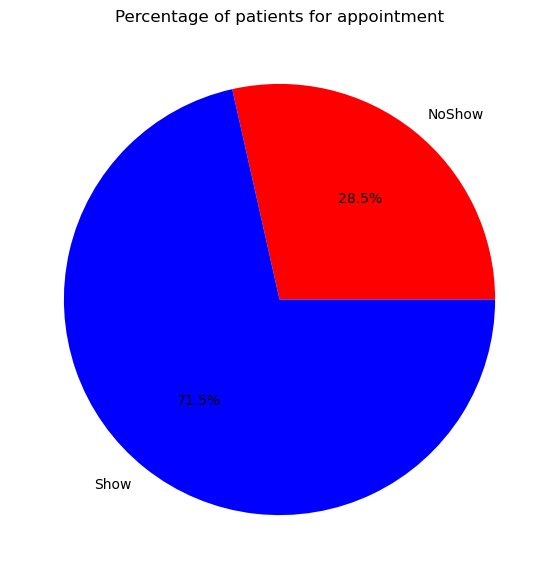

In [123]:
fig,ax=plt.subplots(figsize=(10,7))

sizes = [len(df[df['Show']==0]), len(df[df['Show']==1])]
plt.pie(sizes, autopct='%1.1f%%',colors=['Red','Blue'],labels=['NoShow','Show'])
plt.title('Percentage of patients for appointment')
plt.show()

#### Inference :
In the above Piechart we can see that approximately 20% of the patients do not show up to the clinic after taking the appointment.

In [124]:
# fuction to find the probability
def probability(group):
    rows=[]
    for item in group:
        for level in data[item].unique():
            row = {'Condition':item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df['Show']== 1)])
            row.update({'Level' : level, 'Probability':n/total})
            rows.append(row)
    return pd.DataFrame(rows)

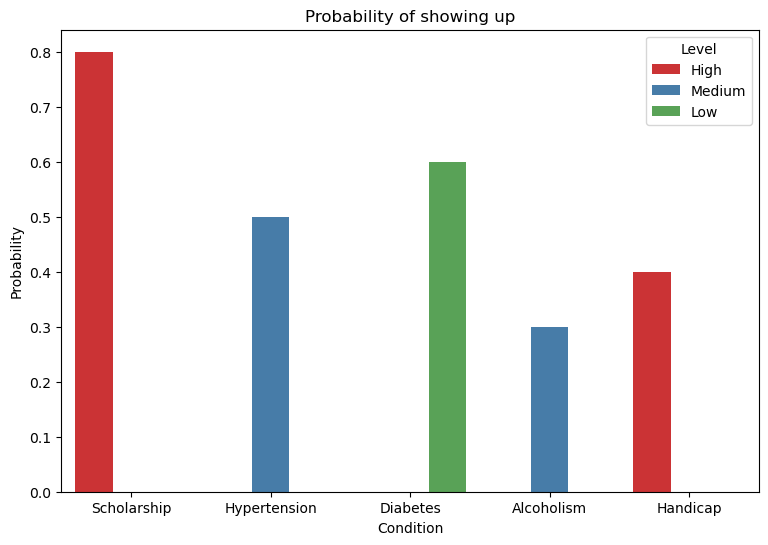

In [125]:
# Assuming df is your DataFrame with the same structure as data
data = pd.DataFrame({
    'Condition': ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'],
    'Probability': [0.8, 0.5, 0.6, 0.3, 0.4],
    'Level': ['High', 'Medium', 'Low', 'Medium', 'High']
})

fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(data=data, x='Condition', y='Probability', hue='Level', palette='Set1')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

#### Inference :
From the above Barplot we can see that people with the Diabetes , Hypertension or are handicap showed up more in comparison to those who are fit and fine.

In [126]:
df.columns

Index(['AppointmentId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SmsReceived', 'Show', 'DayOfTheWeek',
       'AwaitingDays', 'ScheduledDate', 'AppointmentDate',
       'ScheduledDayOfWeek', 'AppointmentDayOfWeek'],
      dtype='object')

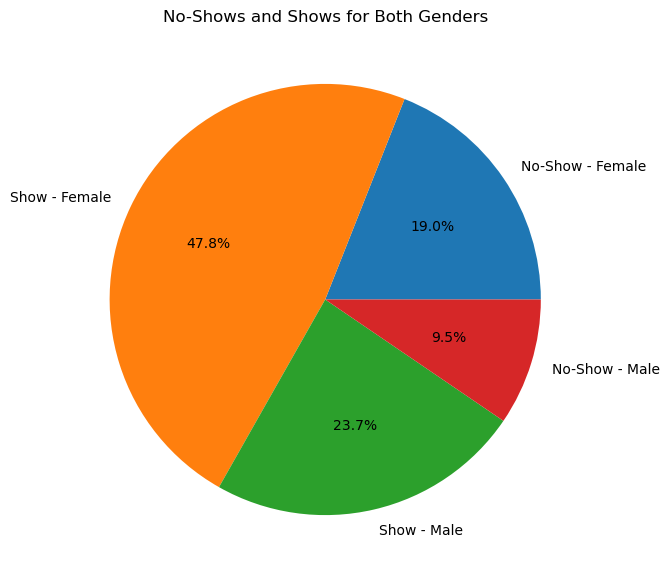

In [127]:

fig, ax = plt.subplots(figsize=(10, 7))

labels = ['No-Show - Female', 'Show - Female', 'Show - Male', 'No-Show - Male']

sizes = [
    len(df[(df['Show'] == 0) & (df['Gender'] == 'F')]),
    len(df[(df['Show'] == 1) & (df['Gender'] == 'F')]),
    len(df[(df['Show'] == 1) & (df['Gender'] == 'M')]),
    len(df[(df['Show'] == 0) & (df['Gender'] == 'M')])
]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('No-Shows and Shows for Both Genders')
plt.show()


### Inference : 
The above Piechart shows that women visit the doctor more often in comparison to men.

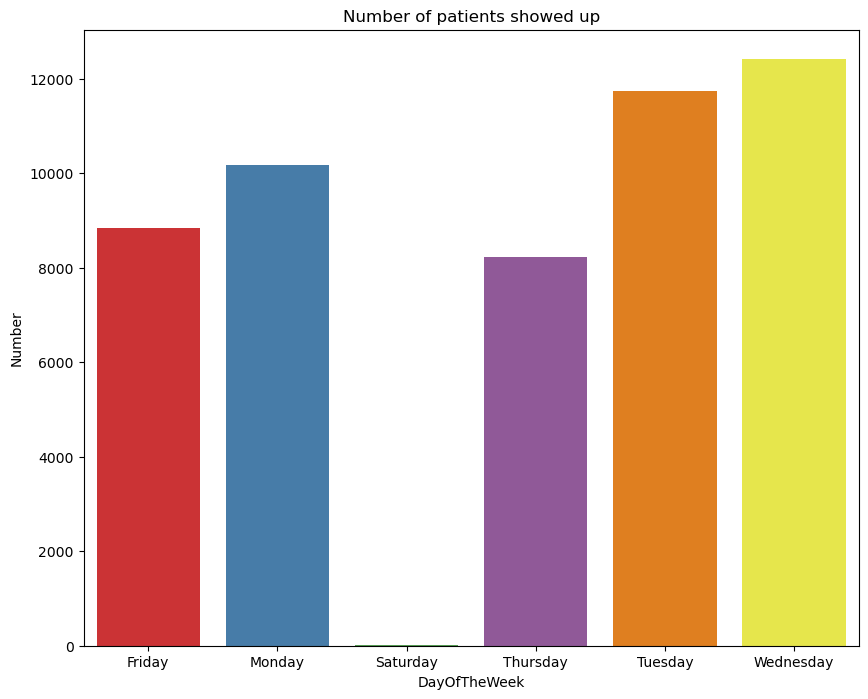

In [128]:
data1 = df[df['Show']==1]
day_group = data1.groupby(['DayOfTheWeek']).size().reset_index(name='Show')

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='DayOfTheWeek', y='Show', data=day_group, palette='Set1', ax=ax)
plt.title('Number of patients showed up')
plt.ylabel('Number')
plt.show()

### Inference : 
The above Barplot shows that Tuesday is the day when more patients visit the doctor and Saturday is the one when approximately none of the patient visits the doctor.

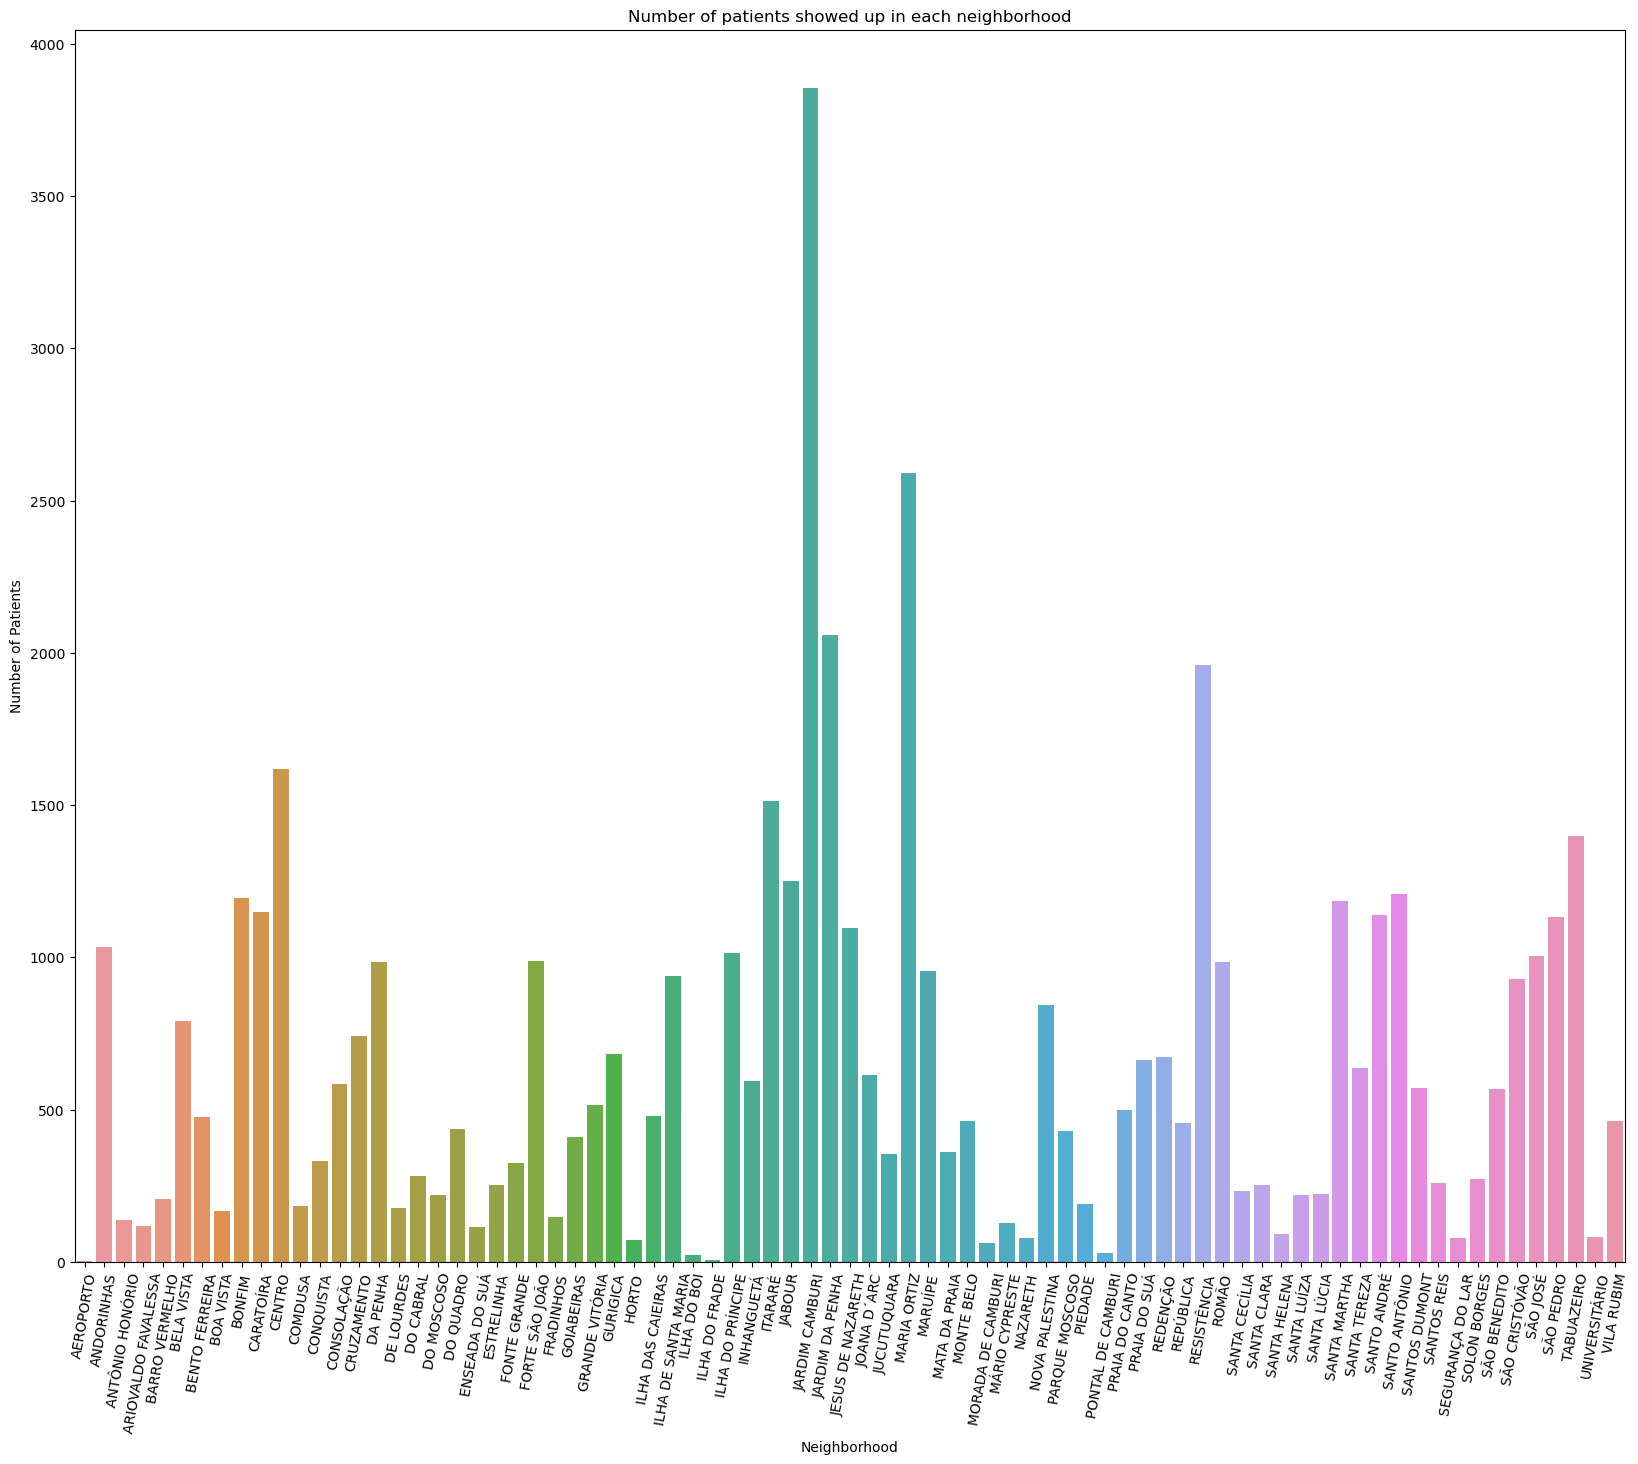

In [129]:
data2 = df[df['Show']==1]
nei_group = data2.groupby(['Neighbourhood']).size().reset_index(name='Show')

fig, ax = plt.subplots(figsize=(20, 16))
sns.barplot(x='Neighbourhood', y='Show', data=nei_group, ax=ax)
plt.xticks(rotation=80)
plt.title('Number of patients showed up in each neighborhood')
plt.ylabel('Number of Patients')
plt.xlabel('Neighborhood')
plt.show()

### Inference : 
From the above bar plot it is clear that Jardim Camburi has the highest i.e. more than 3000 patients. Next is Maria Ortiz with more than 2500 patients

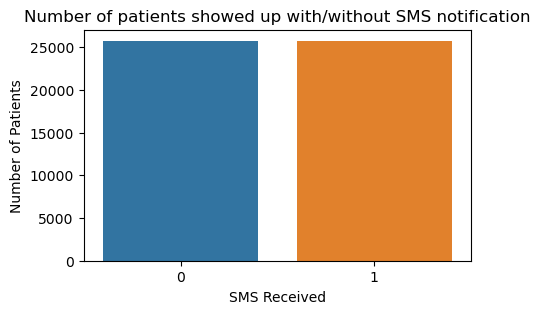

In [130]:
data3 = df[df['Show']==1]
sms_group = data3.groupby(['SmsReceived']).size().reset_index(name='Show')

fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x='SmsReceived', y='Show', data=sms_group, ax=ax)
plt.title('Number of patients showed up with/without SMS notification')
plt.ylabel('Number of Patients')
plt.xlabel('SMS Received')
plt.show()

### Inference : 
Above Barplot shows that the patients who did not receive SMS notification are more as compared to those who did receive the notification and this is obvious that the patients who did not receive notification they will go and check whether their appointment is confirmed or not.

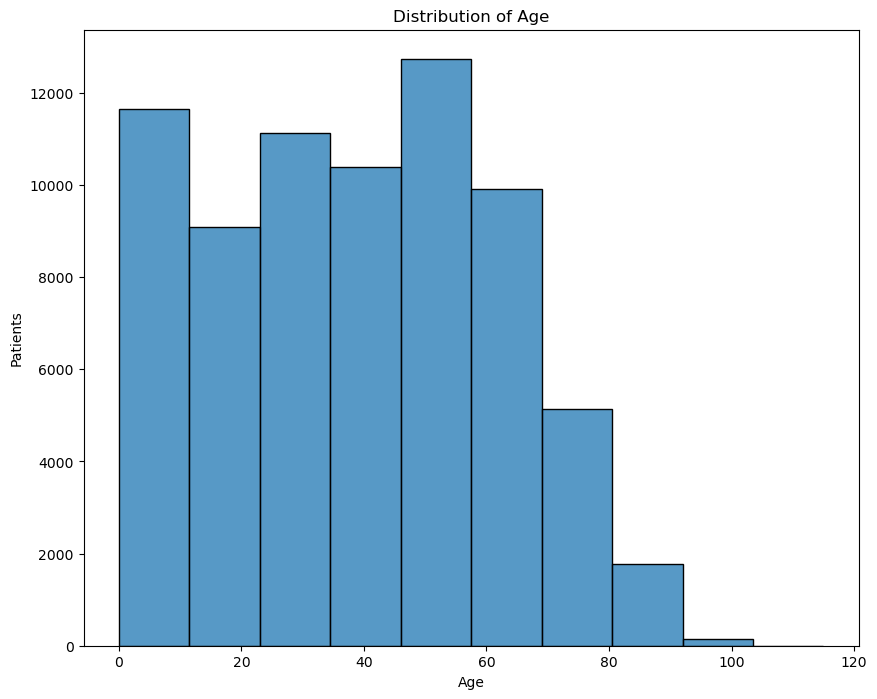

In [131]:
# Distribution of Age
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], bins=10, kde=False)
plt.xlabel("Age")
plt.ylabel("Patients")
plt.title('Distribution of Age')
plt.show()

### Inference :
The above Histogram explains that there are two interval 0-10 and 50-60 with more than 8000 patients each.

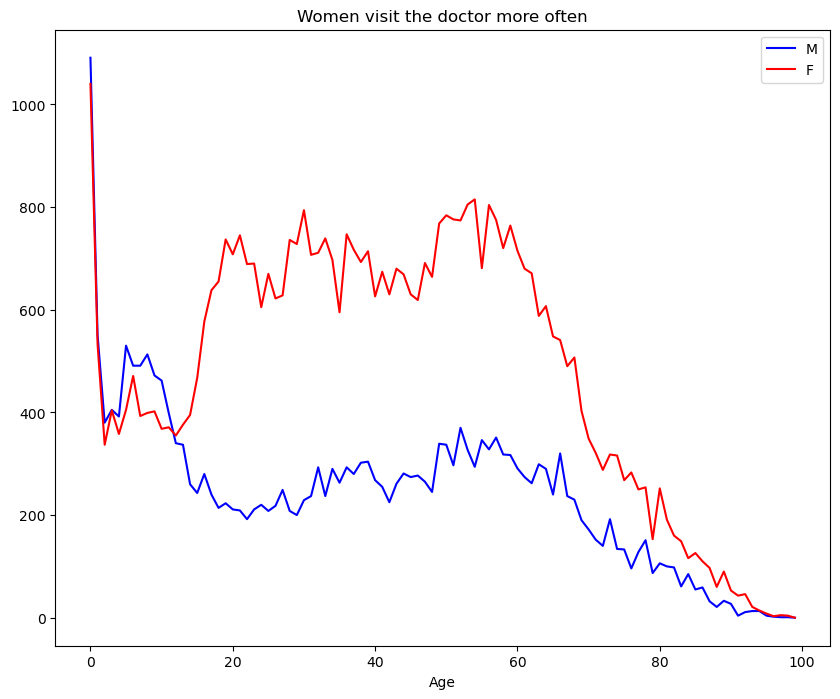

In [132]:
#Distribution of Age with respect to Gender
fig, ax = plt.subplots(figsize=(10,8))
data4 = df[df.Show == 1]
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M')]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F')]))
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'r')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.title('Women visit the doctor more often')
plt.show()

### Inference : 
From the above plot we can conclude that women speciallly who are in the age interval of 50-60 visit the doctor more then men of any age group.

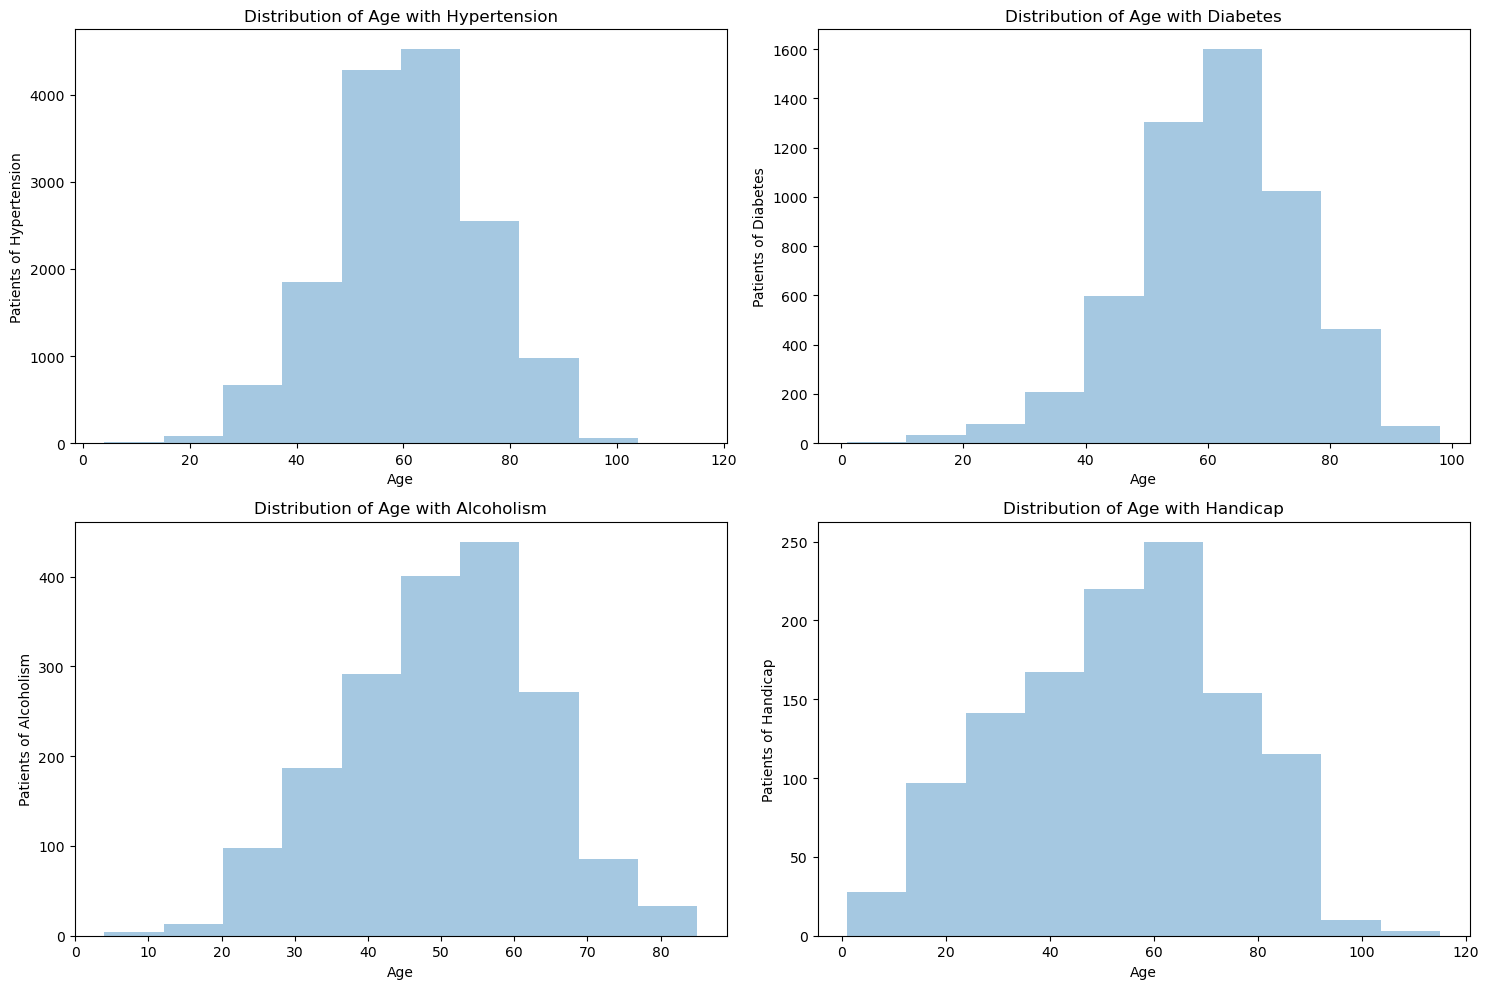

In [133]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df_hyper = df[df['Hypertension']==1]
df_hyper = df_hyper[['Hypertension','Age']]

df_diab = df[df['Diabetes']==1]
df_diab = df_diab[['Diabetes','Age']]

df_alco = df[df['Alcoholism']==1]
df_alco = df_alco[['Alcoholism','Age']]

df_handi= df[df['Handicap']==1]
df_handi = df_handi[['Handicap','Age']]

sns.distplot(df_hyper['Age'], bins=10, kde=False, ax=ax[0, 0])
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Patients of Hypertension")
ax[0, 0].set_title('Distribution of Age with Hypertension')

sns.distplot(df_diab['Age'], bins=10, kde=False, ax=ax[0, 1])
ax[0, 1].set_xlabel("Age")
ax[0, 1].set_ylabel("Patients of Diabetes")
ax[0, 1].set_title('Distribution of Age with Diabetes')

sns.distplot(df_alco['Age'], bins=10, kde=False, ax=ax[1, 0])
ax[1, 0].set_xlabel("Age")
ax[1, 0].set_ylabel("Patients of Alcoholism")
ax[1, 0].set_title('Distribution of Age with Alcoholism')

sns.distplot(df_handi['Age'], bins=10, kde=False, ax=ax[1, 1])
ax[1, 1].set_xlabel("Age")
ax[1, 1].set_ylabel("Patients of Handicap")
ax[1, 1].set_title('Distribution of Age with Handicap')

plt.tight_layout()
plt.show()

#### Inference : 
From the above subplots we can see that people in the age group of 50-70 have visited the doctor more due to different type of diseases or diability

# Model Training

In [134]:
df.describe()

,AppointmentId,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,AwaitingDays
count,7.195900e+04,71959,71959,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
mean,5.655042e+06,2016-05-03 10:18:31.933184,2016-05-19 01:43:02.320487936,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,15.642018
min,5.030230e+06,2015-11-10 00:00:00,2016-04-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.617796e+06,2016-04-25 00:00:00,2016-05-09 00:00:00,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,5.661165e+06,2016-05-05 00:00:00,2016-05-18 00:00:00,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,5.707178e+06,2016-05-17 00:00:00,2016-05-31 00:00:00,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
max,5.784985e+06,2016-06-07 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000
std,7.472189e+04,NaN,NaN,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,16.494334


In [135]:

col = df.columns
for x in col[4:15]:
    print(x + ':', sorted(df[x].unique()))

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 115]
Neighbourhood: ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 

**Checking the Age attribute:** It is not possible to be aged −1 , as well as older than 100 years calls some attention. The latter will be analyzed appropriately at the exploratory data analysis section, but agest under zero are definitely a mistake. In this case, we will first check how many instances correspond to this before treat them.

In [136]:
df[df.Age<0]

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek


In [137]:
df[df.Age>100]

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek
63912,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,False,Thursday,3,2016-05-16,2016-05-19,Monday,Thursday
63915,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,False,Thursday,3,2016-05-16,2016-05-19,Monday,Thursday
68127,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,False,Monday,38,2016-04-08,2016-05-16,Friday,Monday
90372,5751563,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,True,Thursday,2,2016-05-31,2016-06-02,Tuesday,Thursday
97666,5717451,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,True,Friday,15,2016-05-19,2016-06-03,Thursday,Friday


In [138]:
#drop all the ages less than 0 and more than 100
data5=df[(df['Age']<100)&(df['Age']>0)]

**Checking the Handcap attribute:** In the dataset metadata it is said that the handicap attribute should cointain a boolean value. However, as seen above, this attribute assumes values from 0 to 4, probably indicating the handicap number for each patient. In this analysis, we will map to 1 any value higher than 0.

**Gender attribute:** Only two values are expected from this attribute. In order to check its consistency, the sum for both Male and Female classes must equal the total number of instances.

In [139]:
df.Gender.value_counts()

Gender
F    48070
M    23889
Name: count, dtype: int64

In [140]:
df.shape

(71959, 19)

**Schedule and appointment date:** These two attributes are related to when the patient scheduled (ScheduledDay) and to which date he scheduled the appointment (AppointmentDay). It is effort to notice, though, that the AppointmentDay has just the date information, while the ScheduledDay has both date and time information. In this section we will parse the data in order to find out how many days have passed between the schedule date and the appointment date. To get to it, we could use the python native datetime library. However, we choose to use the pandas methods for datetime processing

# Machine Learning

## Decision Tree

### Let's make a Decision Tree based on only the original columns

In [141]:
df_for_decision_tree=df.copy()

In [142]:
df.head()

,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Show,DayOfTheWeek,AwaitingDays,ScheduledDate,AppointmentDate,ScheduledDayOfWeek,AppointmentDayOfWeek
5,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
6,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
7,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,False,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
9,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday
10,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,True,Friday,2,2016-04-27,2016-04-29,Wednesday,Friday


### We extract the Original columns from modified dataset to check the accuracy of Decision Tree algorithm


In [143]:
df_for_decision_tree = df[['Show', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SmsReceived', 'ScheduledDayOfWeek',\
        'ScheduledDay','AppointmentDay','AppointmentDayOfWeek']]

In [144]:
df_for_decision_tree['ScheduledDay']=df_for_decision_tree['ScheduledDay'].dt.day
df_for_decision_tree['AppointmentDay']=df_for_decision_tree['AppointmentDay'].dt.day


In [145]:
df_for_decision_tree.head()

,Show,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ScheduledDayOfWeek,ScheduledDay,AppointmentDay,AppointmentDayOfWeek
5,True,F,76,REPÚBLICA,0,1,0,0,0,0,Wednesday,27,29,Friday
6,False,F,23,GOIABEIRAS,0,0,0,0,0,0,Wednesday,27,29,Friday
7,False,F,39,GOIABEIRAS,0,0,0,0,0,0,Wednesday,27,29,Friday
9,True,F,19,CONQUISTA,0,0,0,0,0,0,Wednesday,27,29,Friday
10,True,F,30,NOVA PALESTINA,0,0,0,0,0,0,Wednesday,27,29,Friday


#### We convert categorical values to dummies

In [146]:
df_for_decision_tree = pd.get_dummies(df_for_decision_tree, columns=['Neighbourhood','AppointmentDayOfWeek','ScheduledDayOfWeek','Gender'])


In [147]:
df_for_decision_tree.shape


(71959, 104)

In [148]:
X = df_for_decision_tree.drop('Show',axis=1)
Y = df_for_decision_tree['Show']
dt = tree.DecisionTreeClassifier(max_depth=2).fit(X,Y)

In [149]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]

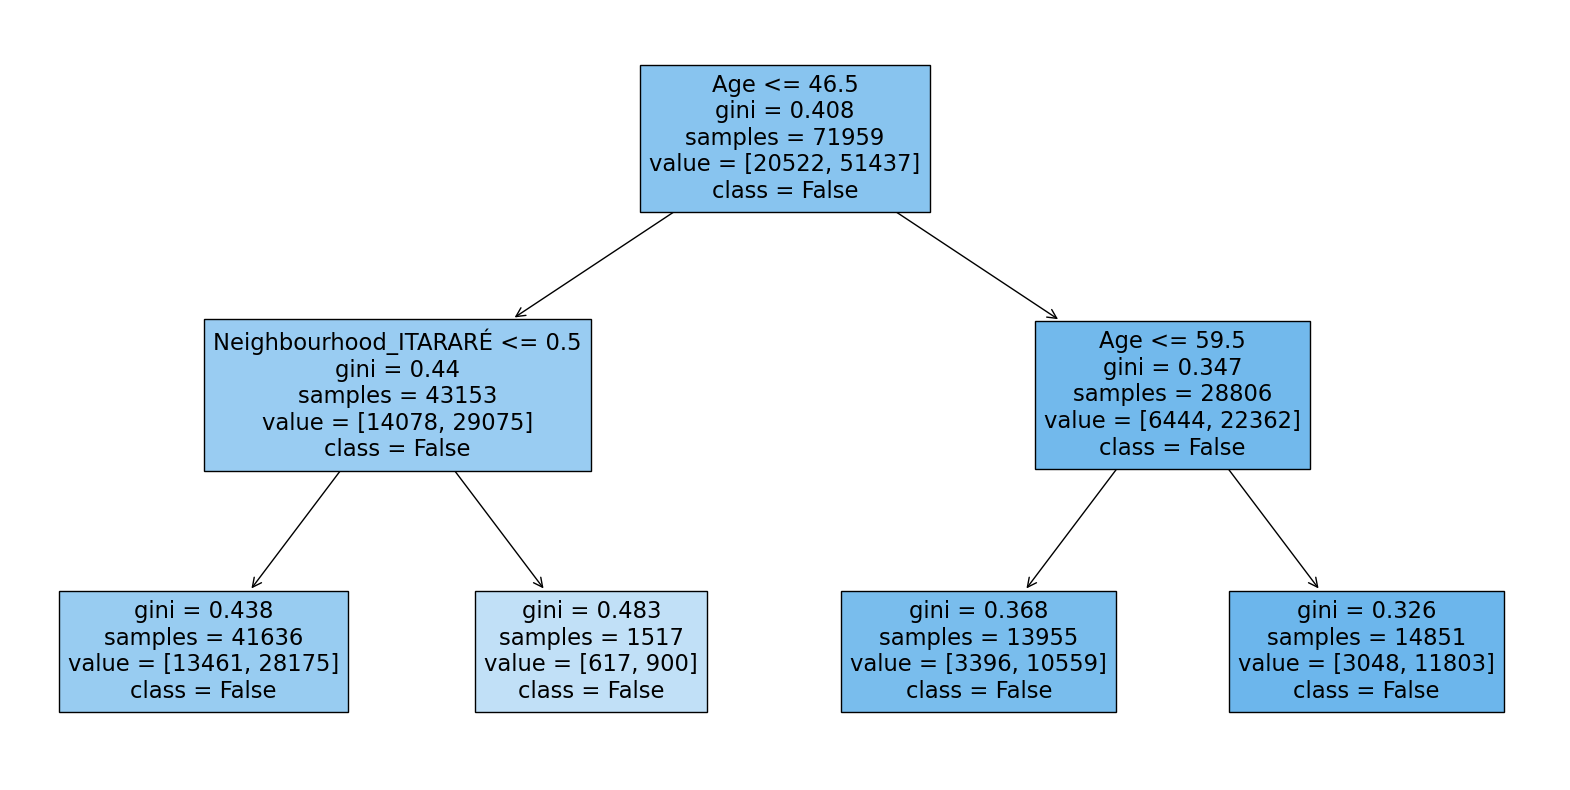

In [150]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)
plt.show()


### Train-Test Split

In [151]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [152]:
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      4091
        True       0.72      1.00      0.83     10301

    accuracy                           0.72     14392
   macro avg       0.36      0.50      0.42     14392
weighted avg       0.51      0.72      0.60     14392



## Inferences

- **Precision**: Model correctly identified 72% of attended appointments, but failed to identify any true no-show appointments.
- **Recall**: Model correctly captured all attended appointments, but missed all no-show appointments.
- **F1-score**: Good balance between precision and recall for attended appointments, but none for no-show appointments.
- **Accuracy**: Overall correctness is 72%.

# Random Forest Classifier 

In [153]:
df_for_random_forest = df[['Show', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension','Diabetes', \
                           'Alcoholism', 'Handicap', 'SmsReceived', 'ScheduledDayOfWeek','ScheduledDay',\
                           'AppointmentDay','AppointmentDayOfWeek']]

In [154]:
df_for_random_forest = pd.get_dummies(df_for_random_forest,columns=['Neighbourhood', 'AppointmentDayOfWeek'])
df_for_random_forest.head()

,Show,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ScheduledDayOfWeek,ScheduledDay,AppointmentDay,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,AppointmentDayOfWeek_Friday,AppointmentDayOfWeek_Monday,AppointmentDayOfWeek_Saturday,AppointmentDayOfWeek_Thursday,AppointmentDayOfWeek_Tuesday,AppointmentDayOfWeek_Wednesday
5,True,F,76,0,1,0,0,0,0,Wednesday,2016-04-27,2016-04-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,False,F,23,0,0,0,0,0,0,Wednesday,2016-04-27,2016-04-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,False,F,39,0,0,0,0,0,0,Wednesday,2016-04-27,2016-04-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

### Converting categorical values of the Gender and ScheduledDayOfWeek into numeric values

In [155]:
df_for_random_forest['Gender'] = df_for_random_forest['Gender'].map({'M':1, 'F':0})
df_for_random_forest['ScheduledDayOfWeek'] = df_for_random_forest['ScheduledDayOfWeek'].map({'Monday':0, 'Tuesday':1,\
                                                                                             'Wednesday':2, 'Thursday':3,\
                                                                                             'Friday':4, 'Saturday':5})                                 

##### As we have already extracted the date values from the ScheduledDay and AppointmentDay columns, dropping them as we do not need the timestamp.

In [156]:
df_for_random_forest.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [157]:
target = 'Show'
predictors = df_for_random_forest.columns[1:]


In [158]:
X = df_for_random_forest[predictors]
Y = df_for_random_forest[target]

### Train-Test Split

In [162]:
X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 5)

In [163]:
clf_rf = RandomForestClassifier(random_state = 5, n_estimators=100)
clf_rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=5)

In [164]:
y_pred_rf = clf_rf.predict(X_test)
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:,1]

In [165]:
report = classification_report(Y_test, y_pred_rf)
print(report)


              precision    recall  f1-score   support

       False       0.37      0.23      0.28      6077
        True       0.74      0.85      0.79     15511

    accuracy                           0.68     21588
   macro avg       0.56      0.54      0.54     21588
weighted avg       0.64      0.68      0.65     21588



**Inferences:**
- The model's performance is significantly better in predicting the class 'True' (show) compared to the class 'False' (no-show). This is evident from the higher precision, recall, and F1-score for the 'True' class.
- The support for the 'True' class is much higher than the 'False' class, indicating class imbalance.
- The model may need further tuning or data balancing techniques to improve its performance on predicting the 'False' class.

# GBM

In [166]:
df_for_GBM = df[['Show', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension','Diabetes', \
                           'Alcoholism', 'Handicap', 'SmsReceived', 'ScheduledDayOfWeek','ScheduledDay',\
                           'AppointmentDay','AppointmentDayOfWeek']]

In [167]:
df_for_GBM = pd.get_dummies(df_for_GBM,columns=['Neighbourhood', 'AppointmentDayOfWeek'])
df_for_GBM.head()

,Show,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ScheduledDayOfWeek,ScheduledDay,AppointmentDay,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,AppointmentDayOfWeek_Friday,AppointmentDayOfWeek_Monday,AppointmentDayOfWeek_Saturday,AppointmentDayOfWeek_Thursday,AppointmentDayOfWeek_Tuesday,AppointmentDayOfWeek_Wednesday
5,True,F,76,0,1,0,0,0,0,Wednesday,2016-04-27,2016-04-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,False,F,23,0,0,0,0,0,0,Wednesday,2016-04-27,2016-04-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,False,F,39,0,0,0,0,0,0,Wednesday,2016-04-27,2016-04-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [168]:
df_for_GBM['Gender'] = df_for_GBM['Gender'].map({'M':1, 'F':0})
df_for_GBM['ScheduledDayOfWeek'] = df_for_GBM['ScheduledDayOfWeek'].map({'Monday':0, 'Tuesday':1,\
                                                                                             'Wednesday':2, 'Thursday':3,\
                                                                                             'Friday':4, 'Saturday':5})                                 

In [169]:
df_for_GBM.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [170]:
target = 'Show'
predictors = df_for_GBM.columns[1:]


#### Train-Test Split

In [171]:
X = df_for_GBM[predictors]
Y = df_for_GBM[target]

X_train, X_test, Y_train, Y_test= \
train_test_split(X,Y,test_size=0.3,random_state = 5)

In [172]:
clf_GBM = GradientBoostingClassifier(random_state=5, n_estimators=100)
clf_GBM.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=5)

In [173]:
y_pred_GBM = clf_GBM.predict(X_test)
y_pred_proba_GBM = clf_GBM.predict_proba(X_test)[:,1]

In [174]:
y_pred_ = clf_GBM.predict(X_test)
y_pred_proba_GBM = clf_GBM.predict_proba(X_test)[:,1]

In [175]:
report = classification_report(Y_test, y_pred_GBM)
print(report)


              precision    recall  f1-score   support

       False       0.64      0.00      0.01      6077
        True       0.72      1.00      0.84     15511

    accuracy                           0.72     21588
   macro avg       0.68      0.50      0.42     21588
weighted avg       0.70      0.72      0.60     21588



## Inference

1. **Precision**: Model struggles with false positives for no-show appointments.
2. **Recall**: Severe difficulty in correctly identifying no-show appointments.
3. **F1-score**: Imbalance between precision and recall, especially for no-show appointments.
4. **Accuracy**: Overall correctness is decent, but precision and recall need improvement, particularly for no-show predictions.

# Models Comparison

## Evaluation Matrix for Comparison

**Using -**

- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**


| Model                    | Precision | Recall | F1-Score | Support | Accuracy |
|--------------------------|-----------|--------|----------|---------|----------|
| Random Forest            |           |        |          |         |          |
|   False                  |   0.37    |  0.23  |   0.28   |  6077   |   0.68   |
|   True                   |   0.74    |  0.85  |   0.79   | 15511   |          |
|   Macro Avg              |   0.56    |  0.54  |   0.54   | 21588   |          |
|   Weighted Avg           |   0.64    |  0.68  |   0.65   | 21588   |          |
|--------------------------|-----------|--------|----------|---------|----------|
| Decision Tree            |           |        |          |         |          |
|   False                  |   0.00    |  0.00  |   0.00   |  4091   |   0.72   |
|   True                   |   0.72    |  1.00  |   0.83   | 10301   |          |
|   Macro Avg              |   0.36    |  0.50  |   0.42   | 14392   |          |
|   Weighted Avg           |   0.51    |  0.72  |   0.60   | 14392   |          |
|--------------------------|-----------|--------|----------|---------|----------|
| Gradient Boosting Machine|           |        |          |         |          |
|   False                  |   0.64    |  0.00  |   0.01   |  6077   |   0.72   |
|   True                   |   0.72    |  1.00  |   0.84   | 15511   |          |
|   Macro Avg              |   0.68    |  0.50  |   0.42   | 21588   |          |
|   Weighted Avg           |   0.70    |  0.72  |   0.60   | 21588   |          |


# Selecting Best Model Out of 3 Models

## Based on these metrics, it seems like the Gradient Boosting Machine performs the best among the three models, as it has the highest accuracy and F1-score for the True class.